# Data Processing

In [1]:
import keras
keras.__version__

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.6'

In [12]:
from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.utils import np_utils

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 64

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
8982 train sequences
2246 test sequences
Pad sequences (samples x time)
input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


# Reduce Network Size

In [17]:
from keras import models
from keras.models import Sequential
from keras import layers
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense


original_model = Sequential()
original_model.add(Embedding(10000, 64))
original_model.add(SimpleRNN(64))
original_model.add(Dense(46, activation='softmax'))

original_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

original_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 46)                2990      
Total params: 651,246
Trainable params: 651,246
Non-trainable params: 0
_________________________________________________________________


In [28]:
bigger_model = models.Sequential()
bigger_model.add(Embedding(10000, 80))
bigger_model.add(SimpleRNN(80))
bigger_model.add(Dense(46, activation='softmax'))

bigger_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 80)          800000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 80)                12880     
_________________________________________________________________
dense_27 (Dense)             (None, 46)                3726      
Total params: 816,606
Trainable params: 816,606
Non-trainable params: 0
_________________________________________________________________


In [49]:
smaller_model = models.Sequential()
smaller_model.add(Embedding(10000, 16))
smaller_model.add(SimpleRNN(16))
smaller_model.add(Dense(46, activation='softmax'))

smaller_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 16)                528       
_________________________________________________________________
dense_31 (Dense)             (None, 46)                782       
Total params: 161,310
Trainable params: 161,310
Non-trainable params: 0
_________________________________________________________________


In [46]:
original_hist = original_model.fit(input_train, y_train, epochs=25,
                        batch_size=256,validation_data=(input_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/25
8982/8982 [==============================] - 30s 3ms/step - loss: 1.3025 - acc: 0.6756 - val_loss: 1.9337 - val_acc: 0.5151
Epoch 2/25
8982/8982 [==============================] - 35s 4ms/step - loss: 1.2032 - acc: 0.6990 - val_loss: 2.0121 - val_acc: 0.5045
Epoch 3/25
8982/8982 [==============================] - 34s 4ms/step - loss: 1.1061 - acc: 0.7210 - val_loss: 2.0516 - val_acc: 0.5107
Epoch 4/25
8982/8982 [==============================] - 33s 4ms/step - loss: 1.0189 - acc: 0.7459 - val_loss: 2.0241 - val_acc: 0.5294
Epoch 5/25
8982/8982 [==============================] - 32s 4ms/step - loss: 0.9330 - acc: 0.7659 - val_loss: 2.1408 - val_acc: 0.4969
Epoch 6/25
8982/8982 [==============================] - 36s 4ms/step - loss: 0.8487 - acc: 0.7958 - val_loss: 2.1262 - val_acc: 0.5285
Epoch 7/25
8982/8982 [==============================] - 30s 3ms/step - loss: 0.7778 - acc: 0.8096 - val_loss: 2.3600 - val_acc: 0.4813
Epoch 8

In [47]:
smaller_hist = smaller_model.fit(input_train, y_train, epochs=25,
                        batch_size=256,validation_data=(input_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/25
8982/8982 [==============================] - 14s 2ms/step - loss: 1.6708 - acc: 0.5514 - val_loss: 2.0083 - val_acc: 0.5254
Epoch 2/25
8982/8982 [==============================] - 13s 1ms/step - loss: 1.5984 - acc: 0.5583 - val_loss: 2.0131 - val_acc: 0.5254
Epoch 3/25
8982/8982 [==============================] - 13s 1ms/step - loss: 1.5286 - acc: 0.5724 - val_loss: 2.0136 - val_acc: 0.5267
Epoch 4/25
8982/8982 [==============================] - 12s 1ms/step - loss: 1.4657 - acc: 0.5864 - val_loss: 2.0221 - val_acc: 0.5325
Epoch 5/25
8982/8982 [==============================] - 12s 1ms/step - loss: 1.4031 - acc: 0.6070 - val_loss: 2.0614 - val_acc: 0.5236
Epoch 6/25
8982/8982 [==============================] - 11s 1ms/step - loss: 1.3478 - acc: 0.6289 - val_loss: 2.0816 - val_acc: 0.4955
Epoch 7/25
8982/8982 [==============================] - 13s 1ms/step - loss: 1.2903 - acc: 0.6546 - val_loss: 2.0620 - val_acc: 0.5138
Epoch 8

In [50]:
bigger_hist = bigger_model.fit(input_train, y_train, epochs=25,
                        batch_size=256,validation_data=(input_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/25
8982/8982 [==============================] - 48s 5ms/step - loss: 0.6028 - acc: 0.8756 - val_loss: 2.1223 - val_acc: 0.4969
Epoch 2/25
8982/8982 [==============================] - 44s 5ms/step - loss: 0.5188 - acc: 0.8969 - val_loss: 2.0865 - val_acc: 0.5169
Epoch 3/25
8982/8982 [==============================] - 47s 5ms/step - loss: 0.4290 - acc: 0.9230 - val_loss: 2.2024 - val_acc: 0.5258
Epoch 4/25
8982/8982 [==============================] - 41s 5ms/step - loss: 0.3648 - acc: 0.9318 - val_loss: 2.3395 - val_acc: 0.4751
Epoch 5/25
8982/8982 [==============================] - 44s 5ms/step - loss: 0.3140 - acc: 0.9413 - val_loss: 2.6884 - val_acc: 0.4506
Epoch 6/25
8982/8982 [==============================] - 42s 5ms/step - loss: 0.3129 - acc: 0.9320 - val_loss: 2.2049 - val_acc: 0.5232
Epoch 7/25
8982/8982 [==============================] - 41s 5ms/step - loss: 0.2404 - acc: 0.9506 - val_loss: 2.3554 - val_acc: 0.4804
Epoch 8

In [53]:
epochs = range(1, 26)
ori_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_hist.history['val_loss']
bigger_model_val_loss = bigger_hist.history['val_loss']

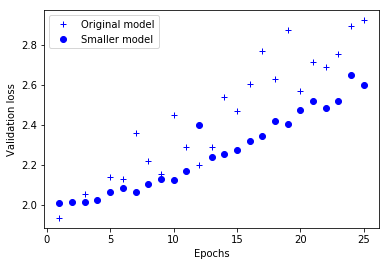

In [54]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, ori_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()




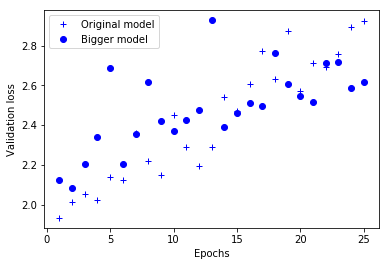

In [55]:
# b+ is for "blue cross"
plt.plot(epochs, ori_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


# Adding Weight Regularization

In [56]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(Embedding(10000, 16))
l2_model.add(SimpleRNN(16,kernel_regularizer=regularizers.l2(0.001)))
l2_model.add(Dense(46, activation='softmax'))

l2_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

l2_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 46)                782       
Total params: 161,310
Trainable params: 161,310
Non-trainable params: 0
_________________________________________________________________


In [58]:
l2_model_hist = l2_model.fit(input_train, y_train, epochs=25,
                        batch_size=256,validation_data=(input_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/25
8982/8982 [==============================] - 13s 1ms/step - loss: 3.4154 - acc: 0.3034 - val_loss: 3.0095 - val_acc: 0.3620
Epoch 2/25
8982/8982 [==============================] - 12s 1ms/step - loss: 2.8017 - acc: 0.3517 - val_loss: 2.6258 - val_acc: 0.3620
Epoch 3/25
8982/8982 [==============================] - 11s 1ms/step - loss: 2.5535 - acc: 0.3517 - val_loss: 2.4888 - val_acc: 0.3620
Epoch 4/25
8982/8982 [==============================] - 12s 1ms/step - loss: 2.4540 - acc: 0.3517 - val_loss: 2.4388 - val_acc: 0.3620
Epoch 5/25
8982/8982 [==============================] - 12s 1ms/step - loss: 2.4221 - acc: 0.3517 - val_loss: 2.4262 - val_acc: 0.3620
Epoch 6/25
8982/8982 [==============================] - 10s 1ms/step - loss: 2.4133 - acc: 0.3517 - val_loss: 2.4221 - val_acc: 0.3620
Epoch 7/25
8982/8982 [==============================] - 9s 998us/step - loss: 2.4090 - acc: 0.3517 - val_loss: 2.4183 - val_acc: 0.3620
Epoch 

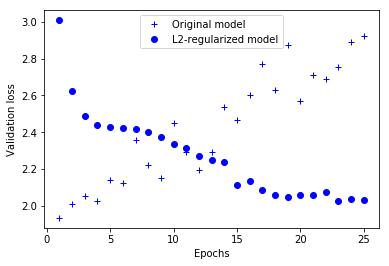

In [59]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, ori_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Adding Dropout

In [63]:
dpt_model = models.Sequential()
dpt_model.add(Embedding(10000, 16))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(SimpleRNN(16,kernel_regularizer=regularizers.l2(0.001)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(Dense(46, activation='softmax'))

dpt_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

dpt_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 16)                528       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 46)                782       
Total params: 161,310
Trainable params: 161,310
Non-trainable params: 0
_________________________________________________________________


In [64]:
dpt_model_hist = dpt_model.fit(input_train, y_train,
                               epochs=25,
                               batch_size=256,
                               validation_data=(input_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/25
8982/8982 [==============================] - 14s 2ms/step - loss: 3.4766 - acc: 0.1278 - val_loss: 3.0724 - val_acc: 0.2199
Epoch 2/25
8982/8982 [==============================] - 12s 1ms/step - loss: 2.9704 - acc: 0.2347 - val_loss: 2.6427 - val_acc: 0.3593
Epoch 3/25
8982/8982 [==============================] - 13s 1ms/step - loss: 2.7268 - acc: 0.2896 - val_loss: 2.4896 - val_acc: 0.3620
Epoch 4/25
8982/8982 [==============================] - 12s 1ms/step - loss: 2.6447 - acc: 0.3013 - val_loss: 2.4472 - val_acc: 0.3620
Epoch 5/25
8982/8982 [==============================] - 13s 1ms/step - loss: 2.5965 - acc: 0.3196 - val_loss: 2.4330 - val_acc: 0.3620
Epoch 6/25
8982/8982 [==============================] - 13s 1ms/step - loss: 2.5592 - acc: 0.3346 - val_loss: 2.4004 - val_acc: 0.3620
Epoch 7/25
8982/8982 [==============================] - 11s 1ms/step - loss: 2.4912 - acc: 0.3631 - val_loss: 2.3600 - val_acc: 0.3785
Epoch 8

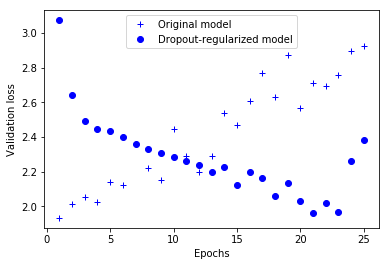

In [65]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, ori_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()